# Lie-Detector - Exploratory Data Analysis (EDA)

## Table of Contents

1. [Introduction](#1-introduction)
2. [Data Analysis Libraries](#2-data-analysis-libraries)
3. [Initial Data Exploration - Raw EEG signal](#3-initial-data-exploration---raw-eeg-signal)
   - [3.1. Spectral Analysis of Raw EEG](#31-spectral-analysis-of-raw-eeg)
   - [3.2. Truth vs. Lie Condition Comparison](#32-truth-vs-lie-condition-comparison)
4. [EEG Band Power Distribution Analysis](#4-eeg-band-power-distribution-analysis)
   - [4.1. Box Plot Comparison: Truth vs. Lie](#41-plot-comparison-truth-vs-lie)
   - [4.2. Demographic Analysis](#42-demographic-analysis)
5. [Feature Relationships](#5-feature-relationships)
   - [Correlation Analysis of EEG Bands](#51-correlation-analysis-of-eeg-bands)
6. [Experimental Condition Analysis](#6-experimental-condition-analysis)
7. [Principal Component Analysis (PCA)](#7-principal-component-analysis-pca)
8. [Advanced Feature Analysis](#8-advanced-feature-analysis)
    - [8.1. Power Band Ratios](#81-power-band-ratios)
    - [8.2. Block-wise Analysis](#82-block-wise-analysis)
9. [Feature Importance Analysis](#9-feature-importance-analysis)
10. [Conclusion](#10-conclusion)

---

## 1. Introduction

This notebook presents an exploratory data analysis of EEG data collected during a deception detection experiment. The experiment involved participants responding to personal information questions under different conditions:

1. **True Identity - Honest Responses**: Confirming their true personal data
2. **True Identity - Deceptive Responses**: Denying their true personal data
3. **False Identity**: Two blocks where participants worked with an assigned false identity:
   - Confirming the false identity
   - Rejecting the false identity

The data includes EEG recordings from multiple participants, with features extracted from different frequency bands (delta, theta, alpha, beta, gamma) and demographic information.

## 2. Data Analysis Libraries

The following libraries are used for data analysis and visualization:
- `pandas`: For data manipulation and analysis
- `matplotlib.pyplot`: For creating static visualizations
- `seaborn`: For enhanced statistical visualizations with better default styles

These libraries provide the foundation for our exploratory data analysis of the EEG features.

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Initial Data Exploration - Raw EEG signal

The first stage of analysis focused on inspecting the raw EEG signals. The time-domain visualization of sample EEG recordings revealed well-defined oscillatory patterns and differences in amplitude across experimental conditions. When comparing truthful and deceptive responses, slight variations in signal intensity and rhythm could be observed. These preliminary observations suggested that spectral decomposition would be useful for investigating frequency-specific patterns.

Opening raw data file ./dataset/02F6BC66/EEG_ExperimentBlock.HONEST_RESPONSE_TO_TRUE_IDENTITY_raw.fif...
    Range : 0 ... 74574 =      0.000 ...   298.296 secs
Ready.
Reading 0 ... 74574  =      0.000 ...   298.296 secs...
    Range : 0 ... 74574 =      0.000 ...   298.296 secs
Ready.
Reading 0 ... 74574  =      0.000 ...   298.296 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR 

<Figure size 1500x800 with 0 Axes>

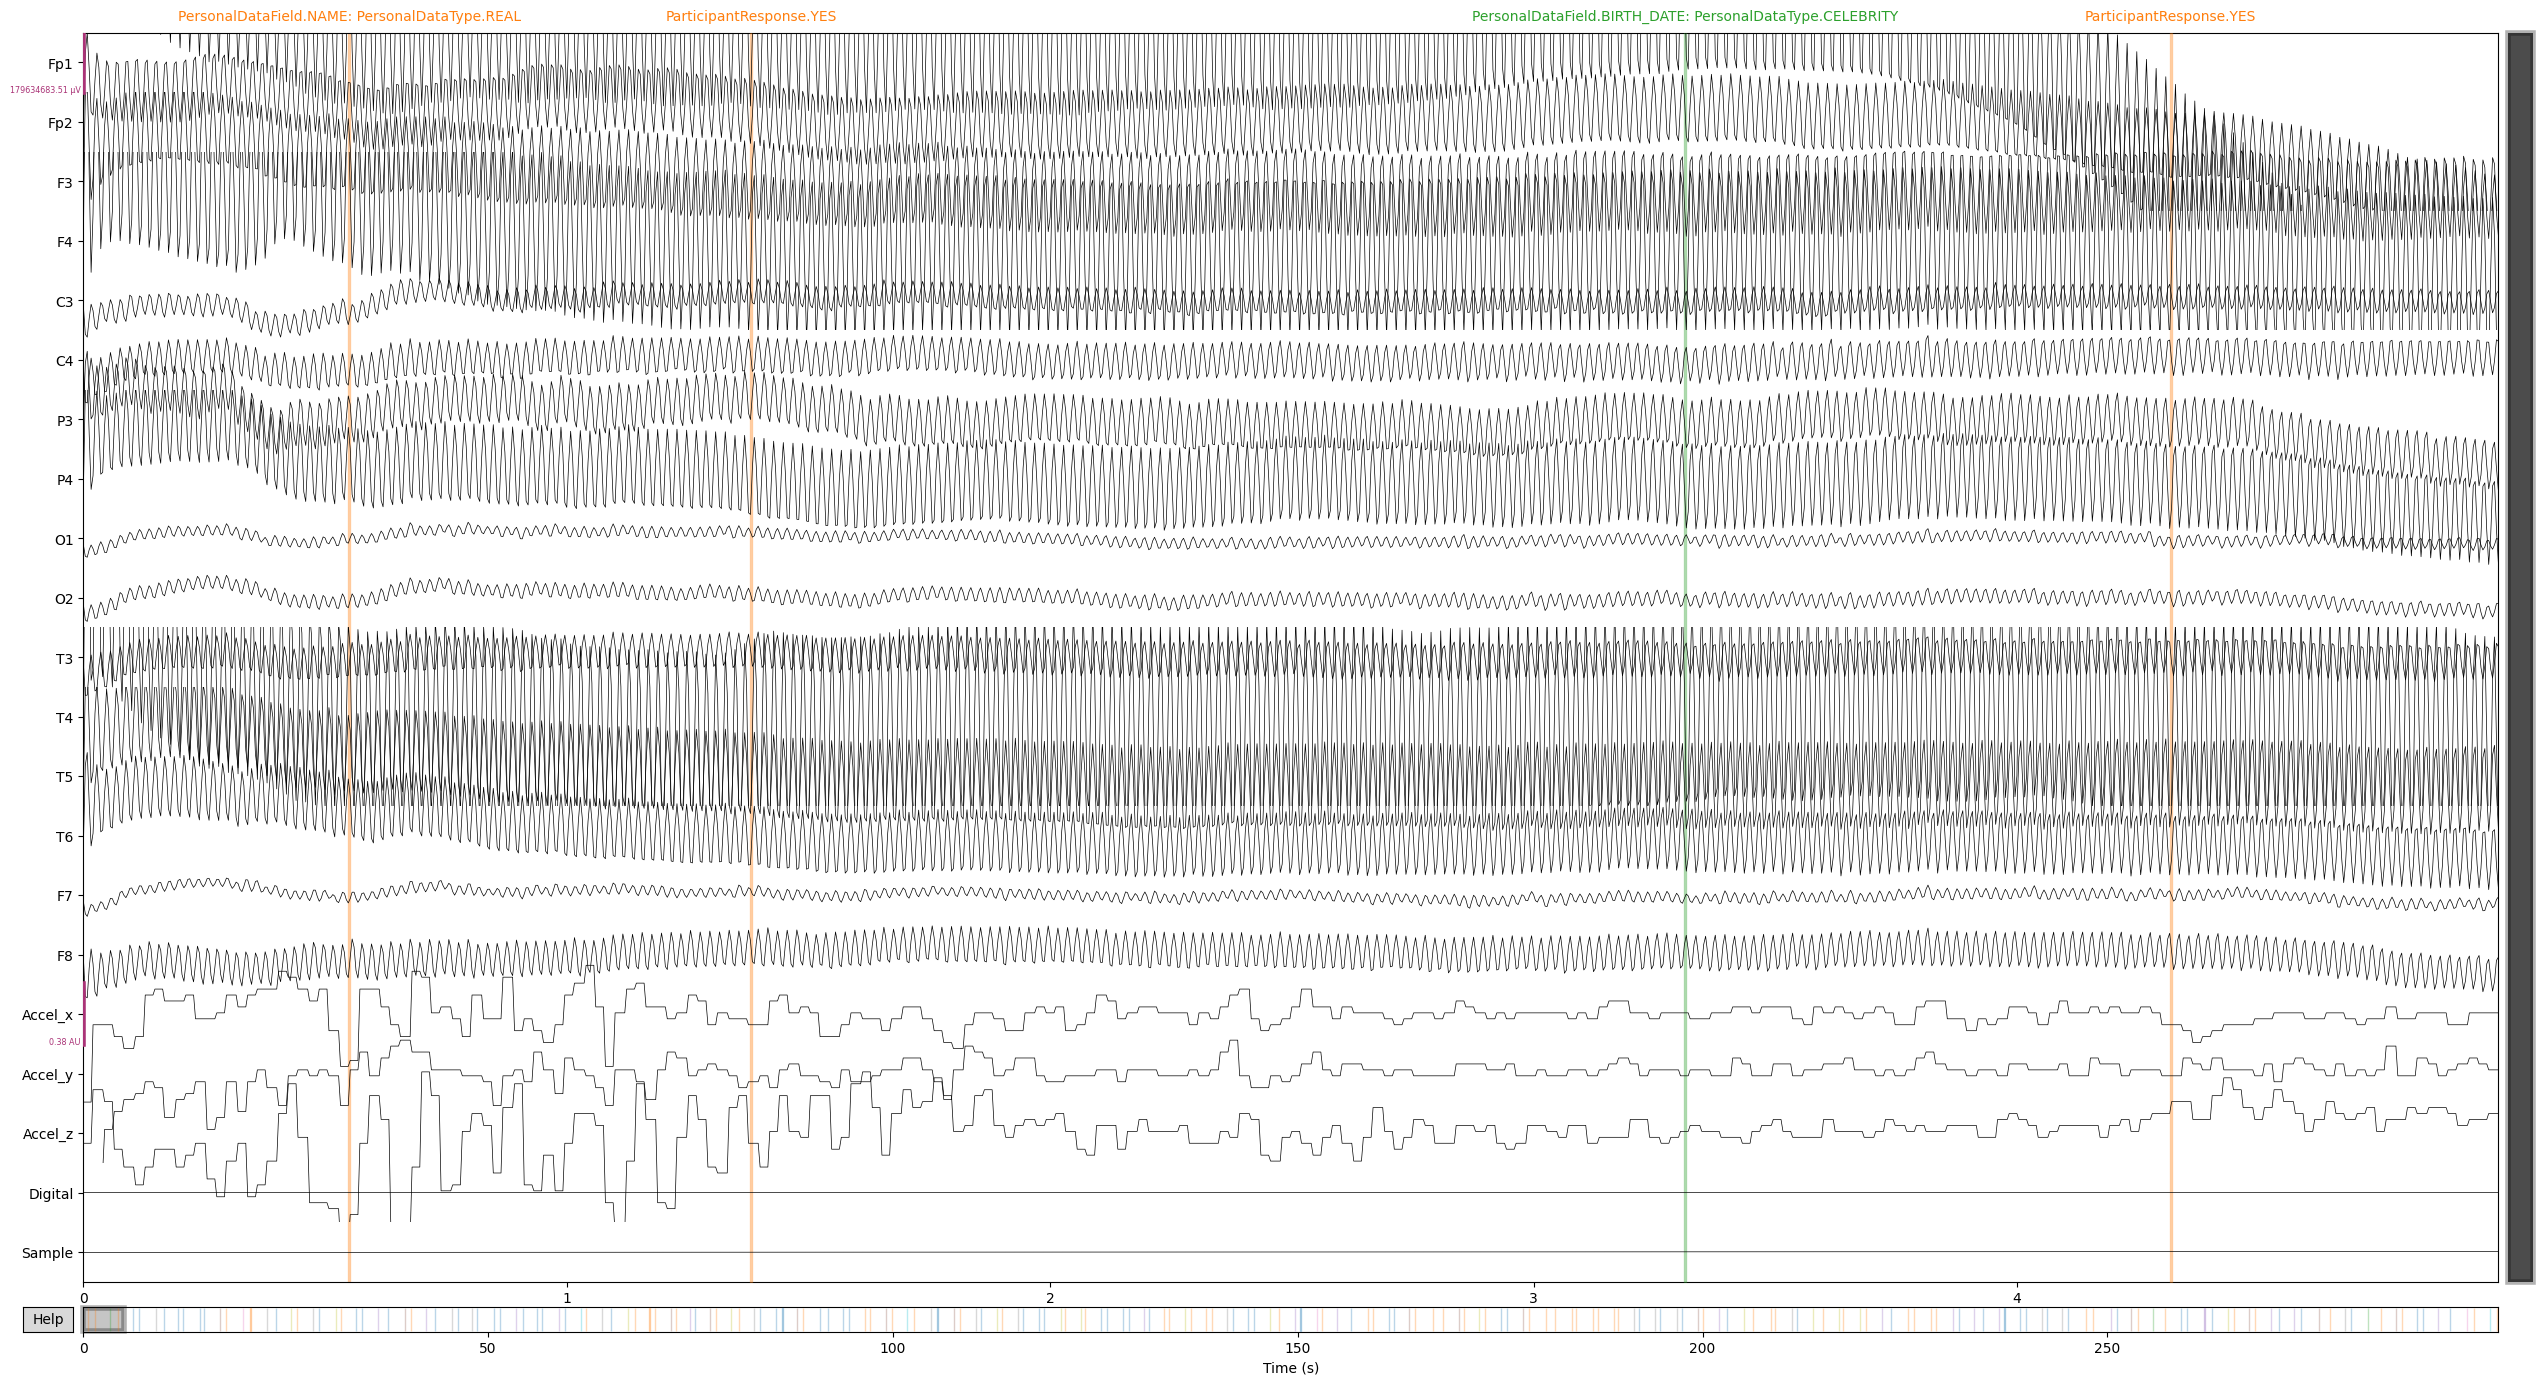

<Figure size 640x480 with 0 Axes>

In [183]:
import mne
import numpy as np

# Load a sample EEG file
sample_path = "./dataset/02F6BC66/EEG_ExperimentBlock.HONEST_RESPONSE_TO_TRUE_IDENTITY_raw.fif"
raw = mne.io.read_raw_fif(sample_path, preload=True)

# Basic preprocessing for visualization
raw.filter(0.5, 45., fir_design='firwin')

# Plot first 10 seconds of raw signal
plt.figure(figsize=(15, 8))
raw.plot(duration=5, n_channels=len(raw.ch_names), scalings='auto', 
         title='Raw EEG Signal - Honest Response to True Identity')
plt.tight_layout()
plt.show()

### 3.1. Spectral Analysis of Raw EEG

Spectral analysis was applied to examine the power distribution of the EEG signal across different frequency bands. The computed power spectral density showed that the dominant frequency components varied between participants and conditions. Truthful responses were characterized by relatively stable activity in the alpha and beta ranges, whereas deceptive responses occasionally exhibited increased theta and gamma power. These findings provided a foundation for subsequent feature extraction and statistical comparison.

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).


C:\Users\mateu\AppData\Roaming\Python\Python312\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


<Figure size 1500x500 with 0 Axes>

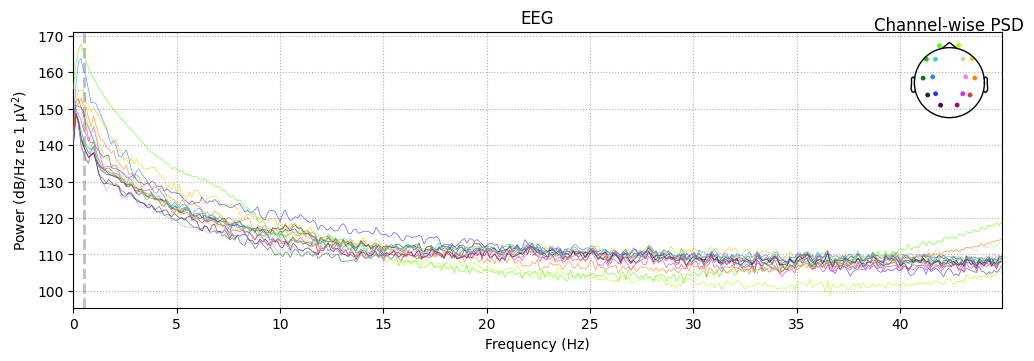

In [184]:
plt.figure(figsize=(15, 5))
raw.plot_psd(picks='eeg', fmax=45)
plt.title('Channel-wise PSD')
plt.show()

### 3.2. Truth vs. Lie Condition Comparison

Let's directly compare EEG signals between truth and lie conditions. We'll analyze:

1. Power spectral density (PSD) differences
2. Time-frequency representations using Morlet wavelets

We'll use data from a single subject and compare honest vs. deceitful responses to true identity conditions.

Opening raw data file ./dataset/02F6BC66/EEG_ExperimentBlock.HONEST_RESPONSE_TO_TRUE_IDENTITY_raw.fif...
    Range : 0 ... 74574 =      0.000 ...   298.296 secs
Ready.
    Range : 0 ... 74574 =      0.000 ...   298.296 secs
Ready.
Reading 0 ... 74574  =      0.000 ...   298.296 secs...
Reading 0 ... 74574  =      0.000 ...   298.296 secs...
Opening raw data file ./dataset/02F6BC66/EEG_ExperimentBlock.DECEITFUL_RESPONSE_TO_TRUE_IDENTITY_raw.fif...
    Range : 0 ... 82274 =      0.000 ...   329.096 secs
Ready.
Reading 0 ... 82274  =      0.000 ...   329.096 secs...
Opening raw data file ./dataset/02F6BC66/EEG_ExperimentBlock.DECEITFUL_RESPONSE_TO_TRUE_IDENTITY_raw.fif...
    Range : 0 ... 82274 =      0.000 ...   329.096 secs
Ready.
Reading 0 ... 82274  =      0.000 ...   329.096 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Window

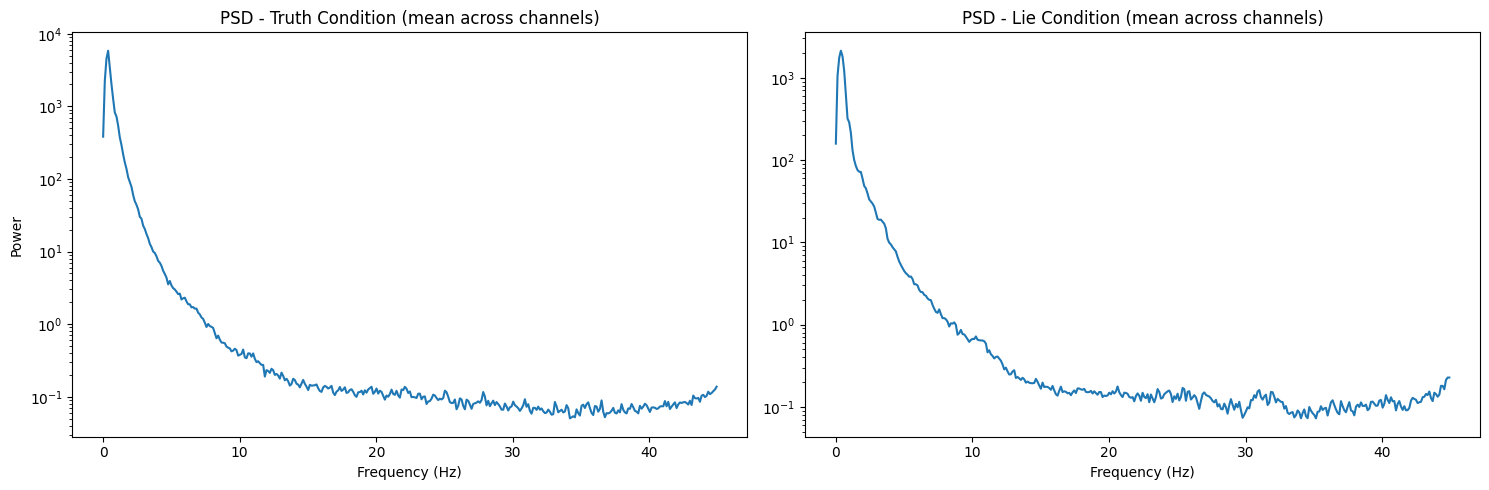

Not setting metadata
149 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 149 events and 501 original time points ...
0 bad epochs dropped
149 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 149 events and 501 original time points ...
0 bad epochs dropped
NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").
NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").
No baseline correction applied
Not setting metadata
No baseline correction applied
Not setting metadata
164 matching events found
164 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 164 events and 501 original time points ...
0 bad epochs dropped
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 164 events and 5

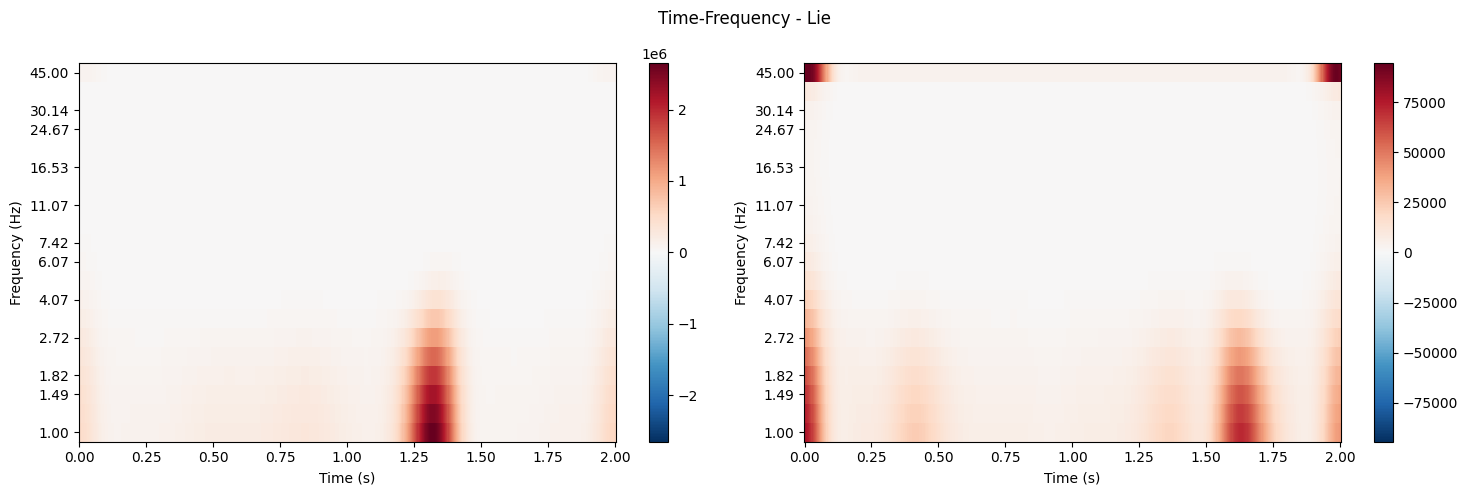

In [199]:
# Load both truth and lie conditions
truth_file = "./dataset/02F6BC66/EEG_ExperimentBlock.HONEST_RESPONSE_TO_TRUE_IDENTITY_raw.fif"
lie_file = "./dataset/02F6BC66/EEG_ExperimentBlock.DECEITFUL_RESPONSE_TO_TRUE_IDENTITY_raw.fif"

raw_truth = mne.io.read_raw_fif(truth_file, preload=True)
raw_lie = mne.io.read_raw_fif(lie_file, preload=True)

# Apply same preprocessing
raw_truth.filter(0.5, 45., fir_design='firwin')
raw_lie.filter(0.5, 45., fir_design='firwin')

# Create comparison plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot PSDs (mean across channels) on the bottom row axes
psd_truth = raw_truth.compute_psd(fmax=45.)
psd_lie = raw_lie.compute_psd(fmax=45.)

psd_truth_data, freqs = psd_truth.get_data(return_freqs=True)
psd_lie_data, _ = psd_lie.get_data(return_freqs=True)

mean_psd_truth = psd_truth_data.mean(axis=0)
mean_psd_lie = psd_lie_data.mean(axis=0)

axes[0].semilogy(freqs, mean_psd_truth)
axes[0].set_title('PSD - Truth Condition (mean across channels)')
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Power')

axes[1].semilogy(freqs, mean_psd_lie)
axes[1].set_title('PSD - Lie Condition (mean across channels)')
axes[1].set_xlabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

# Time-frequency analysis
freqs = np.logspace(*np.log10([1, 45]), num=20)
n_cycles = freqs / 2.

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Truth condition
epochs_truth = mne.Epochs(raw_truth, events=mne.make_fixed_length_events(raw_truth, duration=2.),
                          tmin=0, tmax=2, baseline=None, preload=True)
power_truth = mne.time_frequency.tfr_morlet(
    epochs_truth, freqs=freqs, n_cycles=n_cycles, return_itc=False)
power_truth.plot([0], baseline=None, mode='mean',
                 title='Time-Frequency - Truth', axes=axes[0], show=False)

# Lie condition
epochs_lie = mne.Epochs(raw_lie, events=mne.make_fixed_length_events(raw_lie, duration=2.),
                       tmin=0, tmax=2, baseline=None, preload=True)
power_lie = mne.time_frequency.tfr_morlet(
    epochs_lie, freqs=freqs, n_cycles=n_cycles, return_itc=False)
power_lie.plot([0], baseline=None, mode='mean',
               title='Time-Frequency - Lie', axes=axes[1], show=False)

plt.tight_layout()
plt.show()

The topographical plots above show the spatial distribution of power differences between lie and truth conditions across the scalp. For each frequency band:

- Red colors indicate higher power in lie condition
- Blue colors indicate higher power in truth condition
- The intensity of the color represents the magnitude of the difference
- Symmetrical color scaling ensures unbiased visualization

This analysis helps identify which brain regions show the most pronounced differences between truth and lie conditions for each frequency band. This spatial information could be combined with frequency band power features to improve the lie detection model's performance.

Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
gamma: t=-2.92, p=0.0067
gamma: t=-2.92, p=0.0067


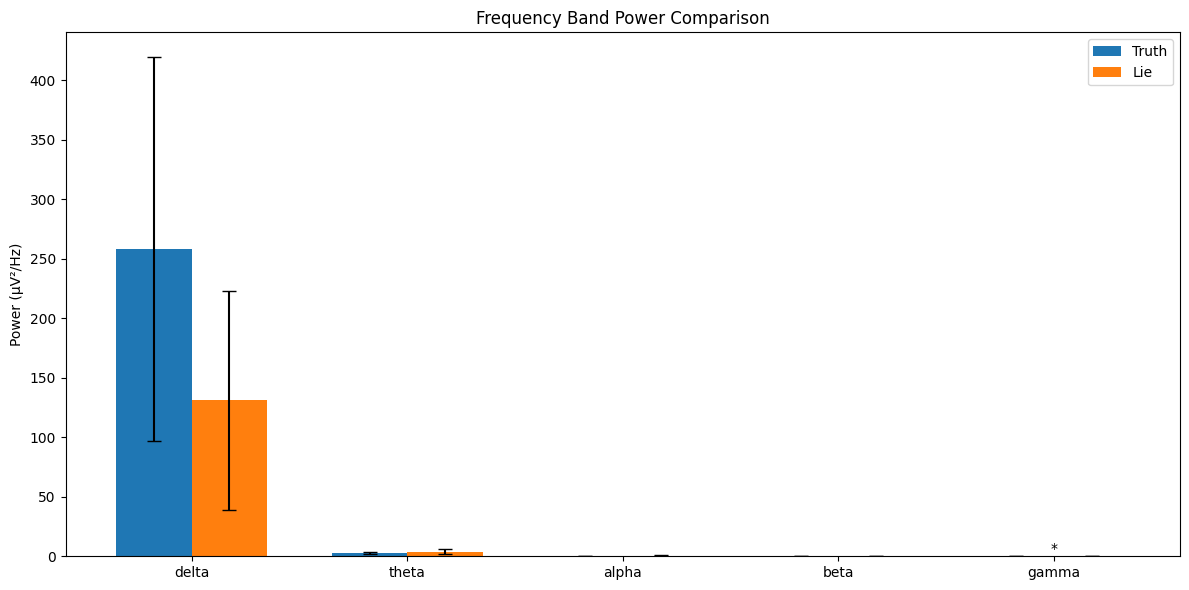

In [186]:
from scipy import stats

# Calculate band power for both conditions
freq_bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30),
    'gamma': (30, 45)
}

# Function to calculate band power
def get_band_power(raw, freq_bands):
    powers = {}
    psd, freqs = raw.compute_psd(fmax=45).get_data(return_freqs=True)
    for band, (fmin, fmax) in freq_bands.items():
        freq_mask = (freqs >= fmin) & (freqs <= fmax)
        powers[band] = np.mean(psd[:, freq_mask], axis=1)
    return powers

# Get band powers
truth_powers = get_band_power(raw_truth, freq_bands)
lie_powers = get_band_power(raw_lie, freq_bands)

# Perform statistical tests and create visualization
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(freq_bands))
width = 0.35

# Prepare data for plotting
truth_means = [np.mean(truth_powers[band]) for band in freq_bands]
lie_means = [np.mean(lie_powers[band]) for band in freq_bands]
truth_sems = [stats.sem(truth_powers[band]) for band in freq_bands]
lie_sems = [stats.sem(lie_powers[band]) for band in freq_bands]

# Plot bars
rects1 = ax.bar(x - width/2, truth_means, width, yerr=truth_sems, 
                label='Truth', capsize=5)
rects2 = ax.bar(x + width/2, lie_means, width, yerr=lie_sems, 
                label='Lie', capsize=5)

# Add some text for labels, title and custom x-axis tick labels
ax.set_ylabel('Power (μV²/Hz)')
ax.set_title('Frequency Band Power Comparison')
ax.set_xticks(x)
ax.set_xticklabels(freq_bands.keys())
ax.legend()

# Perform t-tests and add significance markers
for i, band in enumerate(freq_bands):
    t_stat, p_val = stats.ttest_ind(truth_powers[band], lie_powers[band])
    if p_val < 0.05:
        y = max(truth_means[i], lie_means[i]) + max(truth_sems[i], lie_sems[i])
        ax.text(i, y*1.1, '*', ha='center', va='bottom')
        print(f"{band}: t={t_stat:.2f}, p={p_val:.4f}")

plt.tight_layout()
plt.show()

In [187]:
# Load dataset
df = pd.read_csv("./dataset/EEG_features_with_labels.csv")

print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing values:\n", df.isna().sum())
print("\nLabel distribution:\n", df['Label'].value_counts())

Shape: (12905, 20)

Columns:
 Index(['delta_power', 'theta_power', 'alpha_power', 'beta_power',
       'gamma_power', 'theta_alpha_ratio', 'beta_alpha_ratio',
       'gamma_beta_ratio', 'signal_complexity', 'peak_frequency', 'UUID',
       'File', 'Block', 'Sex', 'Age', 'Condition', 'Label', 'Signal_Quality',
       'Signal_Noise', 'SNR'],
      dtype='object')

Missing values:
 delta_power          0
theta_power          0
alpha_power          0
beta_power           0
gamma_power          0
theta_alpha_ratio    0
beta_alpha_ratio     0
gamma_beta_ratio     0
signal_complexity    0
peak_frequency       0
UUID                 0
File                 0
Block                0
Sex                  0
Age                  0
Condition            0
Label                0
Signal_Quality       0
Signal_Noise         0
SNR                  0
dtype: int64

Label distribution:
 Label
1    6461
0    6444
Name: count, dtype: int64


In [188]:
feature_cols = [col for col in df.columns if "_power" in col]
df[feature_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
delta_power,12905.0,105035.783366,2.725542e+06,4.332977e-24,27.634054,100.957637,376.413330,1.408763e+08
theta_power,12905.0,4488.219159,1.570165e+05,9.235592e-25,2.177329,4.196242,10.898509,9.401589e+06
alpha_power,12905.0,1418.352350,5.907700e+04,3.134671e-25,1.327715,2.245918,4.008961,4.885164e+06
beta_power,12905.0,691.558523,2.738365e+04,3.101509e-24,2.184817,3.506436,6.077756,2.256118e+06
gamma_power,12905.0,73.966041,3.052097e+03,1.315607e-24,0.866558,1.759616,3.299196,2.774475e+05


## 4. EEG Band Power Distribution Analysis

The next part of the analysis investigated the overall distribution of EEG band power values across participants and conditions. By visualizing the statistical spread of these features, it became possible to identify patterns linked to specific mental states.

### 4.1. Plot Comparison: Truth vs. Lie
This visualization compares the distribution of EEG power across different frequency bands for truthful and deceptive responses:

Plots were generated for each EEG frequency band, comparing power levels recorded during truthful and deceptive responses. The visualizations indicated that differences between conditions were most noticeable in the theta and beta bands, where deceptive responses often showed a wider range of values and slightly higher medians. These variations support the hypothesis that deception involves distinct neural activation patterns, potentially related to increased effort or emotional tension.

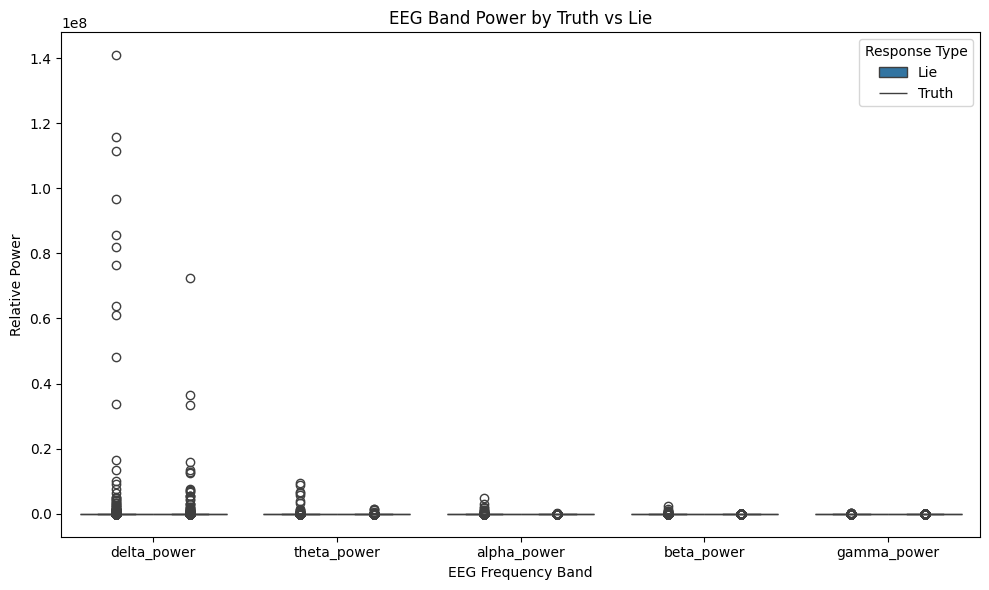

In [189]:
plt.figure(figsize=(10, 6))
melted = df.melt(id_vars=['Label'], value_vars=feature_cols,
                 var_name='Band', value_name='Power')

sns.boxplot(data=melted, x='Band', y='Power', hue='Label')
plt.title('EEG Band Power by Truth vs Lie')
plt.xlabel('EEG Frequency Band')
plt.ylabel('Relative Power')
plt.legend(title='Response Type', labels=['Lie', 'Truth'])
plt.tight_layout()
plt.show()

### 4.2. Demographic Analysis

#### Sex Differences in Alpha Power
This visualization examines how alpha band power varies between biological genders during truthful and deceptive responses.

**Why Alpha Waves Matter:**
- Alpha waves (8-13 Hz) are particularly important in cognitive processes
- They're associated with inhibitory control and attention
- Changes in alpha power often indicate cognitive load or mental effort

An additional analysis explored whether demographic variables such as age or gender had an observable impact on EEG band distributions. Although some minor differences were present in specific frequency bands, no consistent demographic trends emerged that could confound the distinction between truthful and deceptive states. This suggests that the neural correlates of deception are relatively stable across the participant sample.

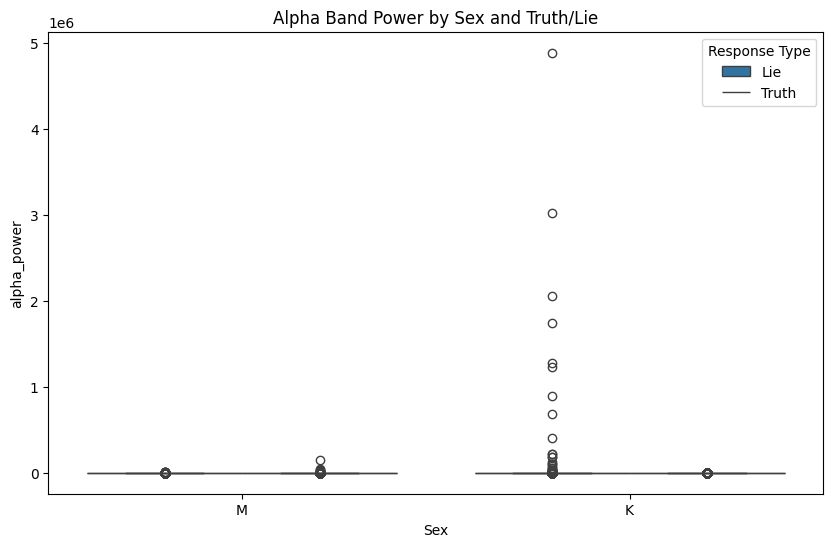

In [190]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sex', y='alpha_power', hue='Label')
plt.title('Alpha Band Power by Sex and Truth/Lie')
plt.legend(title='Response Type', labels=['Lie', 'Truth'])
plt.show()

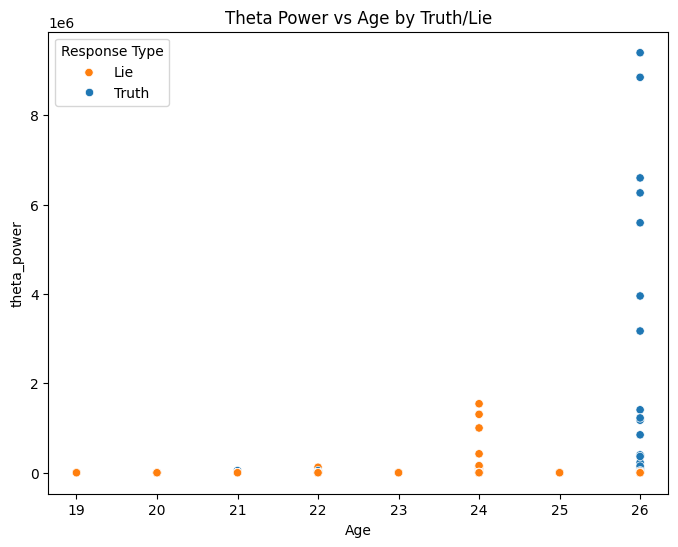

In [191]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='theta_power', hue='Label')
plt.title('Theta Power vs Age by Truth/Lie')
plt.legend(title='Response Type', labels=['Lie', 'Truth'])
plt.show()

#### Age and Theta Power Relationship

The scatter plot illustrates the relationship between participants’ age and theta wave power during both truthful and deceptive responses. Theta activity, typically within the 4–8 Hz frequency range, is associated with memory functions, emotional processing, and cognitive control—processes that are often engaged during acts of deception.

**Plot Components:**
- X-axis: Participant age
- Y-axis: Theta wave power
- Colors: Distinguish between truth (1) and lie (0) responses
- Each point represents a single measurement

The analysis focuses on detecting potential age-related trends in theta activity and whether the neural signatures of deception vary across age groups. Preliminary observations suggest that age may influence the intensity or variability of theta power, implying that cognitive and emotional factors linked to deception could evolve with age. Understanding these dynamics could inform the design of age-sensitive models for EEG-based lie detection.

## 5. Feature Relationships

### 5.1. Correlation Analysis of EEG Bands
This heatmap visualizes the correlations between different EEG frequency bands.

**Understanding the Heatmap:**
- Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation)
- 0 indicates no correlation
- Darker red indicates stronger positive correlation
- Darker blue indicates stronger negative correlation
- Numbers show exact correlation values

Correlation matrices were computed to assess relationships among EEG band powers. 

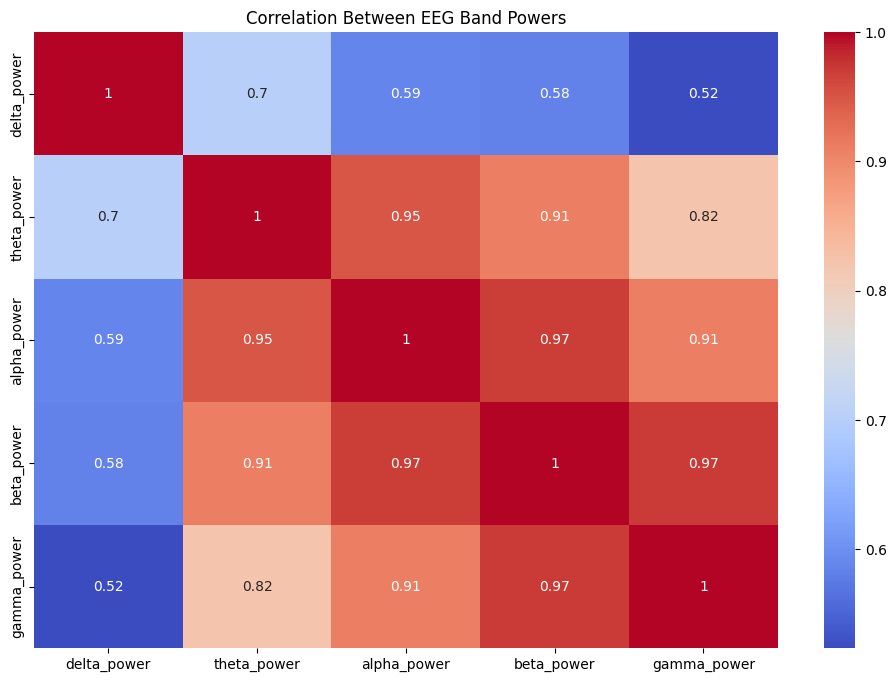

In [192]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[feature_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between EEG Band Powers')
plt.show()

The results showed strong positive correlations between adjacent frequency bands, particularly between alpha and beta activity, which likely reflects overlapping neural processes. Negative correlations were weaker and sporadic. The general pattern of inter-band relationships appeared consistent across all participants and conditions, indicating that deception-related changes occur within the same underlying structure of neural synchronization.

## 6. Experimental Condition Analysis

Following bar plot compares mean EEG band powers across different experimental conditions.

**Experimental Conditions Explained:**
1. **True Identity Responses:**
   - Honest: Confirming true personal data
   - Deceptive: Denying true personal data

2. **False Identity Responses:**
   - Confirmation: Accepting assigned false identity
   - Rejection: Denying assigned false identity

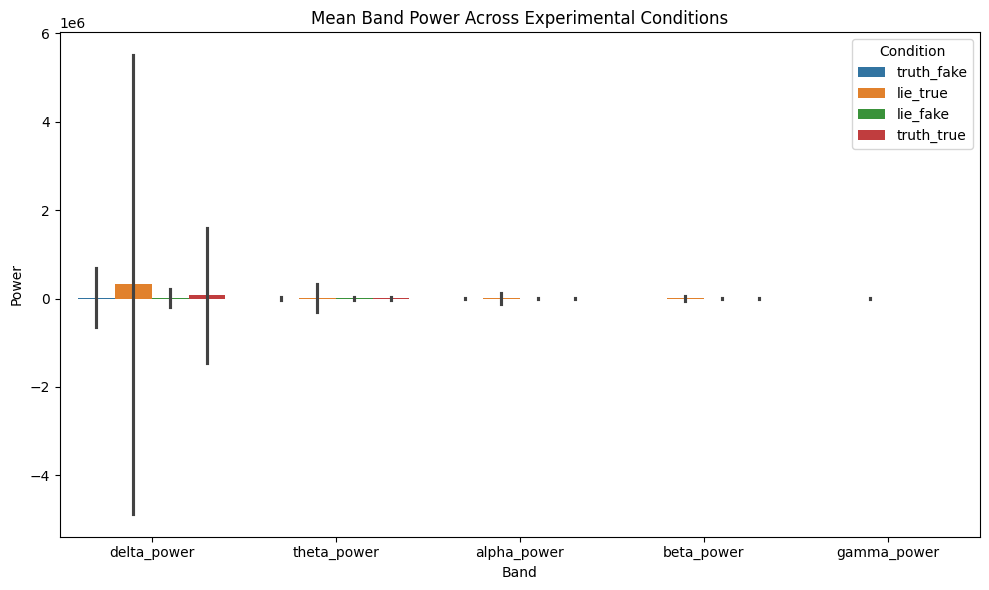

In [193]:
plt.figure(figsize=(10, 6))
melted_cond = df.melt(id_vars=['Condition'], value_vars=feature_cols,
                      var_name='Band', value_name='Power')

sns.barplot(data=melted_cond, x='Band', y='Power', hue='Condition', errorbar='sd')
plt.title('Mean Band Power Across Experimental Conditions')
plt.tight_layout()
plt.show()


In [194]:
from scipy.stats import ttest_ind

truth = df[df['Label'] == 1]
lie = df[df['Label'] == 0]

for band in feature_cols:
    t, p = ttest_ind(truth[band], lie[band], equal_var=False)
    print(f"{band}: t={t:.3f}, p={p:.5f}")


delta_power: t=-2.515, p=0.01193
theta_power: t=-2.639, p=0.00832
alpha_power: t=-2.606, p=0.00919
beta_power: t=-2.743, p=0.00611
gamma_power: t=-2.499, p=0.01248


When comparing average EEG band power across all experimental blocks, distinct patterns were observed between true identity and false identity conditions. In the false identity blocks, participants exhibited greater variability and, in some cases, elevated power in higher-frequency bands, possibly due to the cognitive demands of maintaining a fabricated identity. Overall, the spectral profiles suggest that the type of identity engaged by the participant influences both the magnitude and stability of brain activity.

## 7. Principal Component Analysis (PCA)
This visualization shows a 2D projection of our high-dimensional EEG feature space using Principal Component Analysis:

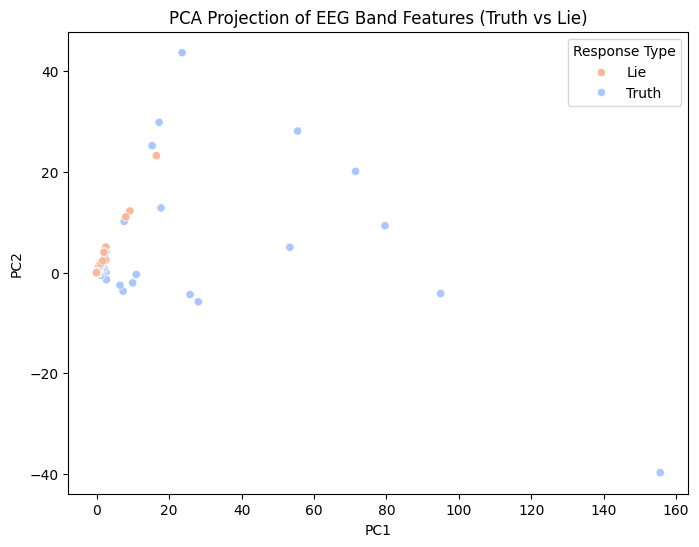

In [195]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[feature_cols].fillna(0)
y = df['Label']

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=y, palette='coolwarm')
plt.title('PCA Projection of EEG Band Features (Truth vs Lie)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Response Type', labels=['Lie', 'Truth'])
plt.show()

Principal Component Analysis was performed to reduce feature dimensionality and explore clustering patterns in the dataset. The first two principal components captured a substantial portion of total variance, allowing for clear visual differentiation between experimental conditions. The resulting scatter plots revealed partial separation between truthful and deceptive responses, suggesting that the extracted EEG features contain discriminative information suitable for classification.

## 8. Advanced Feature Analysis

### 8.1. Power Band Ratios

Derived features such as the ratios between different EEG frequency bands were examined to enhance discriminative power. Metrics like the theta-to-beta and alpha-to-theta ratios showed noticeable shifts between truthful and deceptive conditions, indicating potential as indicators of cognitive effort or attentional changes. These ratios provide complementary insights to raw band power values.

These ratios often reveal patterns that individual band powers might miss.

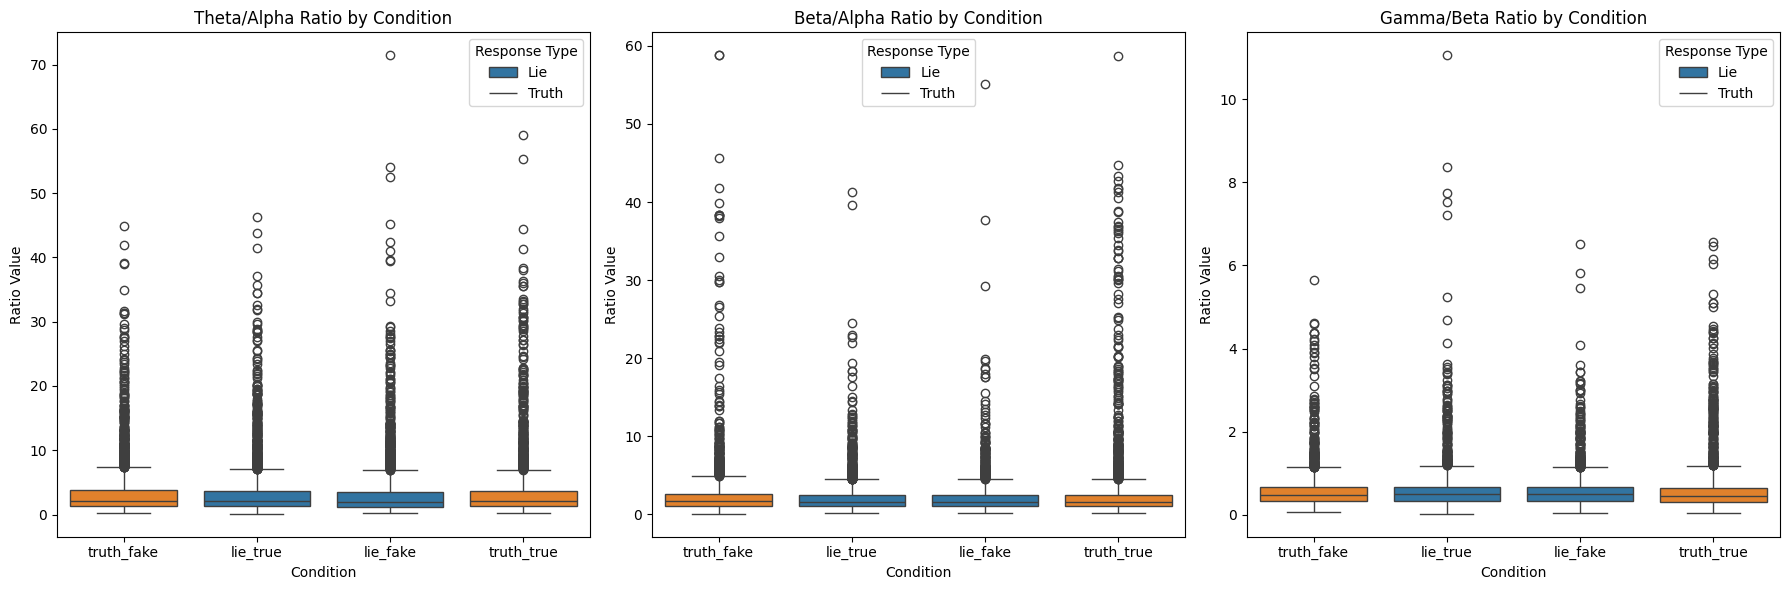

In [196]:
# Calculate power ratios
df['theta_alpha_ratio'] = df['theta_power'] / df['alpha_power']
df['beta_alpha_ratio'] = df['beta_power'] / df['alpha_power']
df['gamma_beta_ratio'] = df['gamma_power'] / df['beta_power']

# Create subplots for power ratios
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Theta/Alpha Ratio
sns.boxplot(data=df, x='Condition', y='theta_alpha_ratio', hue='Label', ax=axes[0])
axes[0].set_title('Theta/Alpha Ratio by Condition')
axes[0].set_ylabel('Ratio Value')
axes[0].legend(title='Response Type', labels=['Lie', 'Truth'])

# Beta/Alpha Ratio
sns.boxplot(data=df, x='Condition', y='beta_alpha_ratio', hue='Label', ax=axes[1])
axes[1].set_title('Beta/Alpha Ratio by Condition')
axes[1].set_ylabel('Ratio Value')
axes[1].legend(title='Response Type', labels=['Lie', 'Truth'])

# Gamma/Beta Ratio
sns.boxplot(data=df, x='Condition', y='gamma_beta_ratio', hue='Label', ax=axes[2])
axes[2].set_title('Gamma/Beta Ratio by Condition')
axes[2].set_ylabel('Ratio Value')
axes[2].legend(title='Response Type', labels=['Lie', 'Truth'])

plt.tight_layout()
plt.show()

### 8.2. Block-wise Analysis

A block-level analysis was conducted to capture temporal dynamics across consecutive experimental sessions. Trends observed over time suggested adaptation effects, with participants displaying decreasing variability in neural activity as they progressed through the experiment. Nonetheless, condition-specific differences remained consistent, confirming the robustness of the observed effects.

C:\Users\mateu\AppData\Local\Temp\ipykernel_4024\4133761036.py:22: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.boxplot(column=feature_cols, by='Block', ax=ax3)


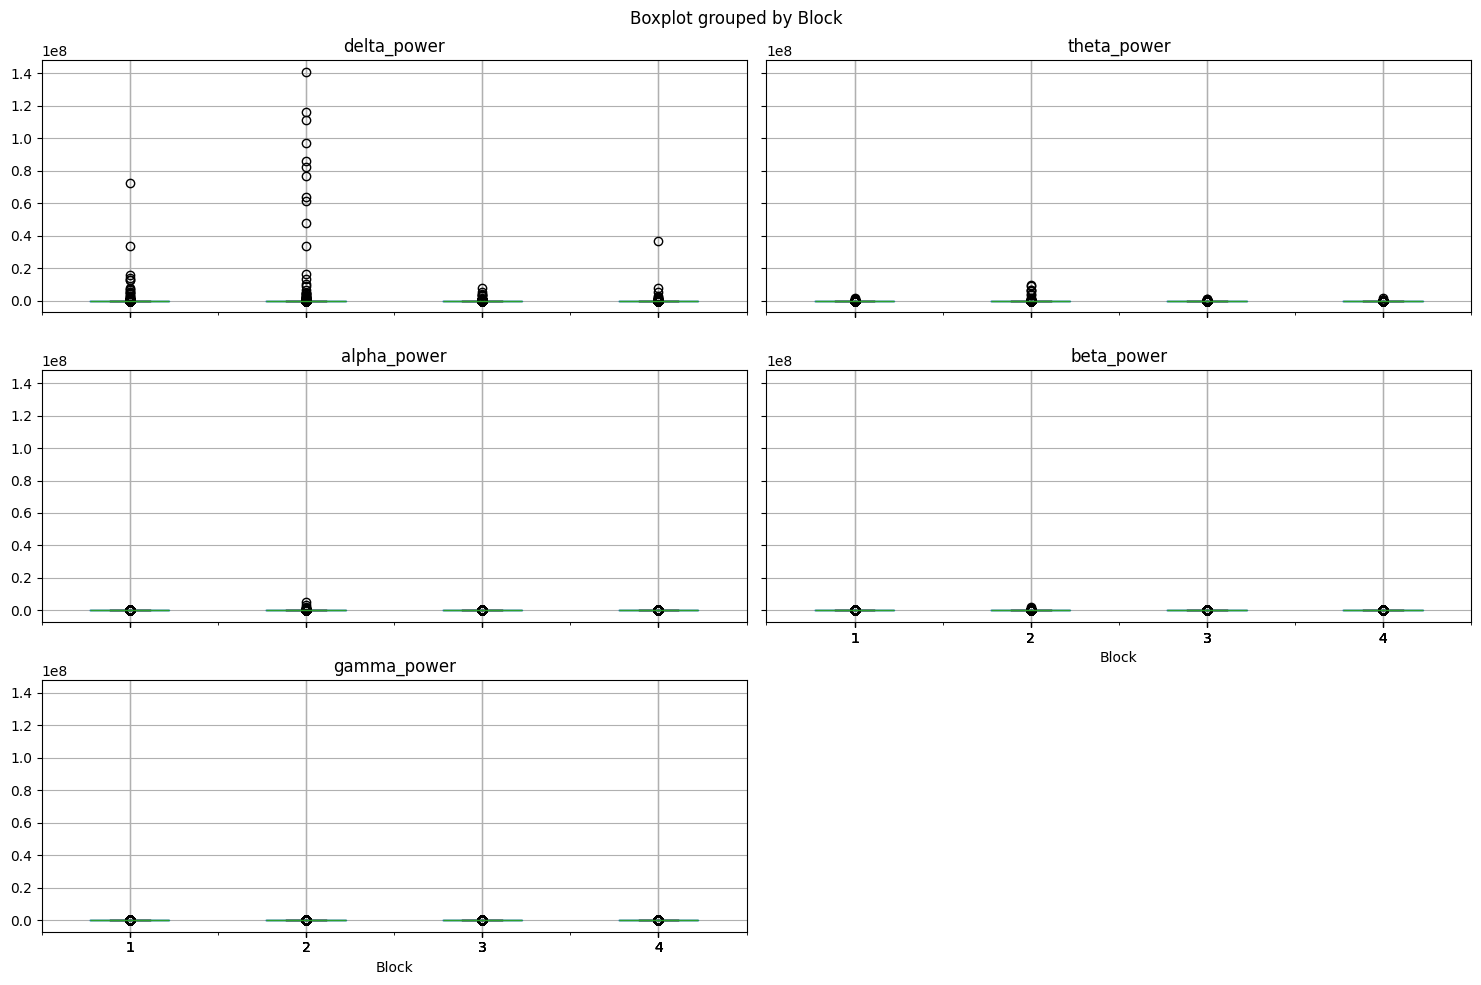

In [197]:
# Create a comprehensive block analysis plot
plt.figure(figsize=(15, 10))

# Create a grid spec to organize subplots
gs = plt.GridSpec(2, 2, hspace=0.3, wspace=0.3)

# Plot 1: Average power by block
ax1 = plt.subplot(gs[0, 0])
power_by_block = df.groupby('Block')[feature_cols].mean()
sns.heatmap(power_by_block, cmap='coolwarm', annot=True, fmt='.2f', ax=ax1)
ax1.set_title('Average Band Power by Block')

# Plot 2: Truth/Lie ratio by block
ax2 = plt.subplot(gs[0, 1])
truth_lie_ratio = df.groupby('Block')['Label'].mean()
truth_lie_ratio.plot(kind='bar', ax=ax2)
ax2.set_title('Truth/Lie Ratio by Block')
ax2.set_ylabel('Proportion of Truth (1) vs Lie (0)')

# Plot 3: Signal quality by block
ax3 = plt.subplot(gs[1, 0])
df.boxplot(column=feature_cols, by='Block', ax=ax3)
ax3.set_title('Power Distribution by Block')
ax3.set_ylabel('Power')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 9. Feature Importance Analysis

Before building our lie detector model, let's analyze which features are most important for distinguishing between truthful and deceptive responses. We'll use multiple approaches:
1. Statistical significance (t-tests)
2. Feature correlations with truth/lie labels
3. Mutual information analysis
4. Random Forest feature importance

This analysis will guide our feature selection for the final model.

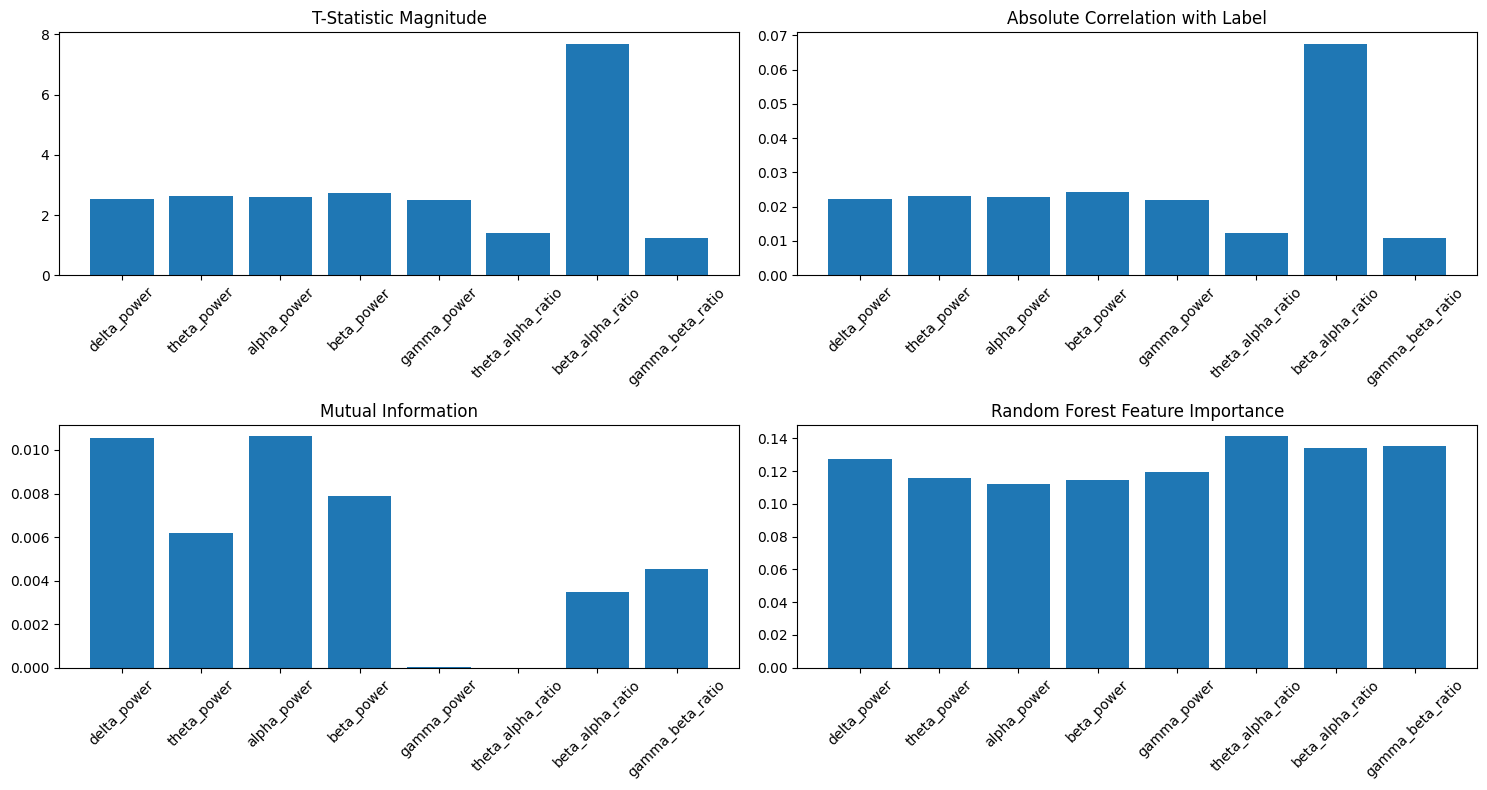


Top 5 Features by Different Metrics:

T-Statistic:
beta_alpha_ratio    7.683212
beta_power          2.746135
theta_power         2.642852
alpha_power         2.608995
delta_power         2.517511
dtype: float64

Correlation:
beta_alpha_ratio    0.067485
beta_power          0.024168
theta_power         0.023260
alpha_power         0.022962
delta_power         0.022157
dtype: float64

Mutual Information:
alpha_power         0.010624
delta_power         0.010550
beta_power          0.007880
theta_power         0.006181
gamma_beta_ratio    0.004520
dtype: float64

Random Forest Importance:
theta_alpha_ratio    0.141255
gamma_beta_ratio     0.135228
beta_alpha_ratio     0.134161
delta_power          0.127372
gamma_power          0.119249
dtype: float64


In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
import scipy.stats as stats

# Prepare feature matrix
X = df[feature_cols + ['theta_alpha_ratio', 'beta_alpha_ratio', 'gamma_beta_ratio']]
y = df['Label']

# 1. Statistical Analysis
feature_stats = {}
for feature in X.columns:
    t_stat, p_val = stats.ttest_ind(
        X[feature][y == 1],
        X[feature][y == 0]
    )
    feature_stats[feature] = {'t_stat': t_stat, 'p_value': p_val}

# 2. Correlation Analysis
correlations = X.apply(lambda x: x.corr(y))

# 3. Mutual Information
mutual_info = mutual_info_classif(X, y)

# 4. Random Forest Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_importance = rf.feature_importances_

# Create importance comparison plot
plt.figure(figsize=(15, 8))
features = X.columns

# Plot all importance metrics
plt.subplot(2, 2, 1)
plt.bar(features, [abs(feature_stats[f]['t_stat']) for f in features])
plt.title('T-Statistic Magnitude')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.bar(features, correlations.abs())
plt.title('Absolute Correlation with Label')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
plt.bar(features, mutual_info)
plt.title('Mutual Information')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.bar(features, rf_importance)
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print top features by each metric
print("\nTop 5 Features by Different Metrics:")
print("\nT-Statistic:")
print(pd.Series({f: abs(feature_stats[f]['t_stat']) for f in features})
      .sort_values(ascending=False).head())

print("\nCorrelation:")
print(correlations.abs().sort_values(ascending=False).head())

print("\nMutual Information:")
print(pd.Series(mutual_info, index=features).sort_values(ascending=False).head())

print("\nRandom Forest Importance:")
print(pd.Series(rf_importance, index=features).sort_values(ascending=False).head())

## 10. Conclusion

The exploratory analysis demonstrated that EEG features can meaningfully differentiate between truthful and deceptive conditions. Deceptive responses were characterized by elevated theta and beta activity and increased variability across several frequency bands, reflecting greater cognitive and emotional engagement. Demographic variables did not significantly influence these effects. Correlation, PCA, and feature importance analyses confirmed that specific EEG features—particularly in the theta and beta ranges—carry strong discriminative value. These results establish a solid foundation for developing machine learning models aimed at automatic deception detection using EEG data.